<a href="https://colab.research.google.com/github/migo2555/ml-product-category-prediction-based-on-title-/blob/main/notebook/product_category_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Product Category Prediction Based on Product Title  

**Notebook:** `product_category_prediction.ipynb`  
**Project:** `ml-product-category-prediction-based-on-title-`

**Author:** `Jovic Miodrag`

This project focuses on building a Machine Learning model that predicts the product category based solely on the product title.  
The dataset contains product listings, including their titles and associated categories.  
The goal is to analyze the text data, preprocess it, extract features, and train an ML model capable of accurately predicting product categories.


## Step 1 — Load Dataset from GitHub

In this first step, we load the dataset directly from the GitHub repository using its raw file URL.  
We use `pandas` to read the CSV file into a DataFrame and display basic information such as:

- total number of rows  
- the first few rows of the dataset  

This allows us to verify that the data was successfully loaded and to understand its structure before performing any preprocessing or modeling.

In [2]:
import pandas as pd

# load data from GitHub
url = "https://raw.githubusercontent.com/migo2555/ml-product-category-prediction-based-on-title-/main/data/TASK_03-products.csv"

df = pd.read_csv(url)

print("Number of rows:", len(df))
print("First 5 rows:")
print(df.head())


Number of rows: 35311
First 5 rows:
   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   

   Category Label _Product Code  Number_of_Views  Merchant Rating  \
0   Mobile Phones    QA-2276-XC            860.0              2.5   
1   Mobile Phones    KA-2501-QO           3772.0              4.8   
2   Mobile Phones    FP-8086-IE           3092.0              3.9   
3   Mobile Phones    YI-0086-US            466.0              3.4   
4   Mobile Phones    NZ-3586-WP           4426.0              1.6   

   Listing Date    
0       5/10/2024  
1      12/31/2024  
2 

##  Step 2 — Exploring the Dataset

In this step, we perform a quick exploratory check of the dataset:

 **Dataset shape** — prints the number of rows and columns to understand the dataset size.  
 **First 5 rows** — displays the first few records to get an overview of the data.  
 **Dataset info** — shows column names, data types, and non-null counts to identify missing values and understand data types.


In [3]:
# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()


Dataset shape (rows, columns): (35311, 8)

First 5 rows:


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


**Result Highlights:**
- The dataset contains **35,311 rows** and **8 columns**.  
- Some columns, like `Product Title`, `Category Label`, `_Product Code`, `Number_of_Views`, `Merchant Rating`, and `Listing Date`, have **missing values**.  
- The data types are a mix of **integers, floats, and objects (strings)**.  

This initial exploration helps us identify columns that may need cleaning or preprocessing in the next step.

## Step 3 — Checking Missing Values

In this step, we check for **missing values** in the dataset.  
The code below counts the number of missing (NaN) values for each column using `df.isna().sum()`.  

This helps identify which columns require **data cleaning or imputation** before training the ML model.


In [4]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


## Step 4 — Visualizing Missing Values

In this step, we create a **heatmap** to visualize missing values in the dataset.  
Using `seaborn` and `matplotlib`, the heatmap highlights which rows and columns contain NaN values, making it easier to spot patterns of missing data.  

This visual check complements the previous step where we counted missing values per column.


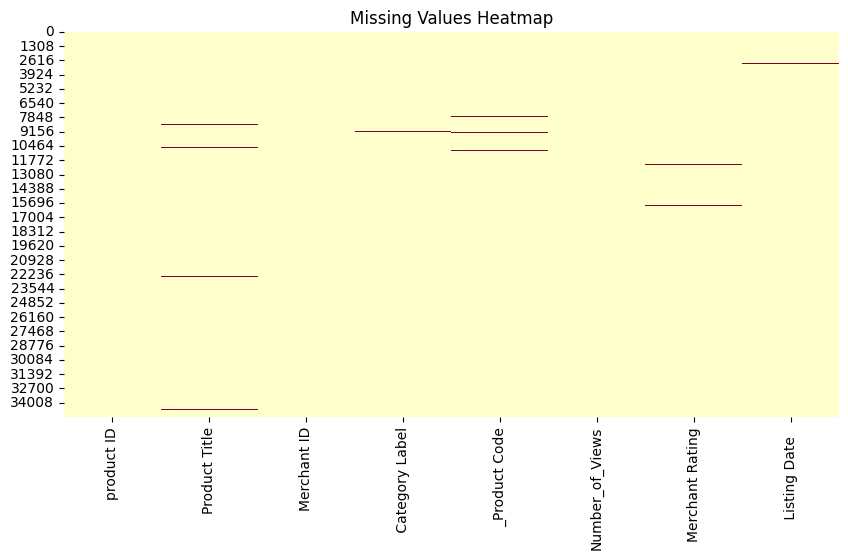

In [5]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()


## Step 5 — Visualize Missing Values

In this step, we visualize the missing values in the dataset.  

1. **Bar chart (Matplotlib)** — shows the number of missing values per column.  
2. **Colored bar chart (optional / enhanced)** — uses different colors to make columns with missing values easier to distinguish.  

This step helps identify problematic columns and guides decisions for data cleaning before model training.


In [6]:
# Count missing values per column
missing_counts = df.isna().sum()

print("Missing values per column:")
print(missing_counts)

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


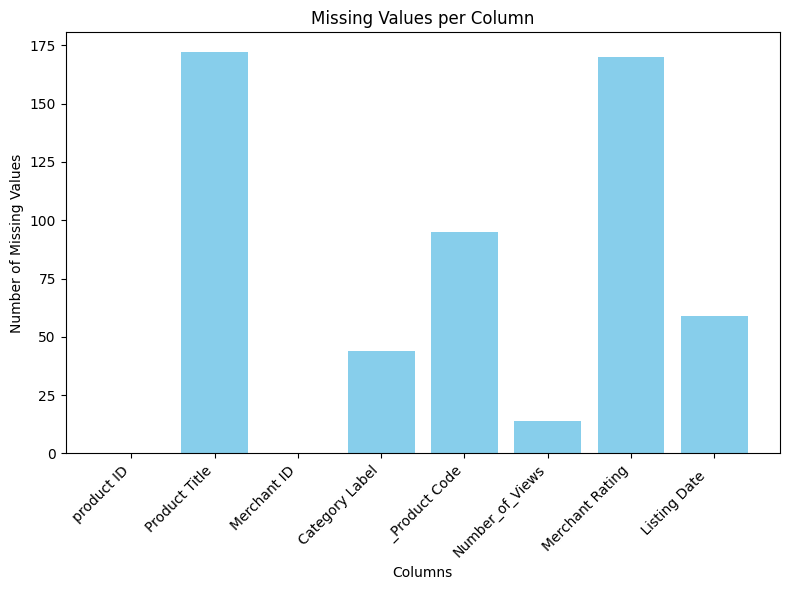

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count missing values per column
missing_counts = df.isna().sum()

# Plot missing values as a bar chart
plt.figure(figsize=(8,6))
plt.bar(x=missing_counts.index, height=missing_counts.values, color='skyblue')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')  # Rotira nazive kolona radi preglednosti
plt.tight_layout()
plt.show()

## Step 6 - Cleaning Column Names

The code below removes any leading or trailing spaces from the column names.
This ensures consistent naming and prevents errors when accessing columns later in the workflow.

In [8]:
df.columns = df.columns.str.strip()

print("Cleaned column names:")
print(df.columns.tolist())

Cleaned column names:
['product ID', 'Product Title', 'Merchant ID', 'Category Label', '_Product Code', 'Number_of_Views', 'Merchant Rating', 'Listing Date']


## Step 7 — Cleaning and Preprocessing the Dataset

This step performs essential data-cleaning operations to prepare the dataset for modeling.
The preprocessing includes:

- Renaming columns for consistency and easier use in code.

- Handling missing values:

    - Numeric columns are filled with the median.

    - Text columns are filled with the placeholder "Unknown".

- Removing rows with missing target labels (Category_Label).

- Standardizing text columns by converting them to lowercase and stripping extra spaces.

- Converting the date column (Listing_Date) into a proper datetime format.

These operations ensure that the dataset is clean, consistent, and ready for the next stage—feature engineering and model training.

In [12]:
import pandas as pd

# Rename columns for easier access
df = df.rename(columns={
    'Product Title': 'Product_Title',
    'Category Label': 'Category_Label',
    '_Product Code': 'Product_Code',
    'Merchant Rating': 'Merchant_Rating',
    'Listing Date': 'Listing_Date'
})

# Drop all rows with missing values
df = df.dropna()

# Define numeric and text columns
numeric_cols = ['Number_of_Views', 'Merchant_Rating']
text_cols = ['Product_Title', 'Product_Code']

# Fill missing numeric values with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing text values with "unknown"
for col in text_cols:
    df[col] = df[col].fillna("unknown")

# Convert Listing_Date to datetime; missing values become NaT
df['Listing_Date'] = pd.to_datetime(df['Listing_Date'], errors='coerce')

# Drop rows with missing target category
df = df.dropna(subset=['Category_Label'])

# 8. Standardize text columns to lowercase and strip whitespace
for col in ['Product_Title', 'Category_Label', 'Product_Code']:
    df[col] = df[col].str.lower().str.strip()

# Show final dataset info
print("Cleaned dataset info:")
df.info()

print("\nCleaned dataset head:")
display(df.head())


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 35208 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   product ID       35208 non-null  int64         
 1   Product_Title    35208 non-null  object        
 2   Merchant ID      35208 non-null  int64         
 3   Category_Label   35208 non-null  object        
 4   Product_Code     35208 non-null  object        
 5   Number_of_Views  35208 non-null  float64       
 6   Merchant_Rating  35208 non-null  float64       
 7   Listing_Date     35208 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 2.4+ MB

Cleaned dataset head:


,product ID,Product_Title,Merchant ID,Category_Label,Product_Code,Number_of_Views,Merchant_Rating,Listing_Date
0,1,apple iphone 8 plus 64gb silver,1,mobile phones,qa-2276-xc,860.0,2.5,2024-05-10
1,2,apple iphone 8 plus 64 gb spacegrau,2,mobile phones,ka-2501-qo,3772.0,4.8,2024-12-31
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,mobile phones,fp-8086-ie,3092.0,3.9,2024-11-10
3,4,apple iphone 8 plus 64gb space grey,4,mobile phones,yi-0086-us,466.0,3.4,2022-05-02
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,mobile phones,nz-3586-wp,4426.0,1.6,2023-04-12


## Summary:

The dataset has been thoroughly cleaned: numeric missing values were imputed with medians, text fields with "Unknown", textual data standardized, and the date column converted to datetime. Rows missing the target label were removed, resulting in 35,208 complete records.

## Checking the Dataset Structure After Cleaning

After removing missing values from the dataset, this part of the code displays the new number of rows and columns (`df.shape`) and prints the total number of remaining missing values in each column.


In [13]:
# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (35208, 8)
Missing values per column:
product ID         0
Product_Title      0
Merchant ID        0
Category_Label     0
Product_Code       0
Number_of_Views    0
Merchant_Rating    0
Listing_Date       0
dtype: int64
